In [99]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
torch.manual_seed(1)

In [100]:
def train_model(model, x, y):
    max_epochs = 20000
    epoch_arr = []
    loss_arr = []
    
    epoch = 0
    converged = False
    
    while not converged:
        epoch += 1
        
        # Forward pass
        predictions = model(x)
        loss = loss_func(predictions, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track progress
        epoch_arr.append(epoch)
        loss_arr.append(loss.item())
        
        # Print loss every 500 epochs
        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')
        
        # Check for convergence or max epoch
        if epoch >= max_epochs:
            print("Max Epochs Reached")
            converged = True
        
        # Convergence condition based on loss difference
        elif epoch > 5 and loss_arr[-1] < 0.001:
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergence reached with loss: {loss_arr[-1]:.6f}")
                converged = True
    
    return epoch_arr, loss_arr, predictions


In [101]:
x = np.expand_dims(np.arange(-1.5, 2, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(350, 1)
(350, 1)


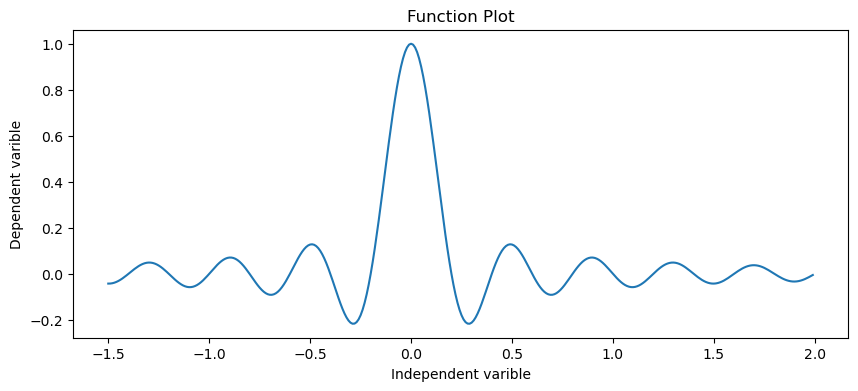

In [102]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y)
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [103]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10,20)
        self.linear3 = nn.Linear(20, 10)
        self.predict = nn.Linear(10, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = self.predict(x)
        return x
 
model_1 = Model1()

In [104]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_1, x, y)

461
Epoch: 500, Loss: 0.0042
Epoch: 1000, Loss: 0.0036
Epoch: 1500, Loss: 0.0034
Epoch: 2000, Loss: 0.0034
Epoch: 2500, Loss: 0.0031
Epoch: 3000, Loss: 0.0026
Epoch: 3500, Loss: 0.0025
Epoch: 4000, Loss: 0.0023
Epoch: 4500, Loss: 0.0022
Epoch: 5000, Loss: 0.0021
Epoch: 5500, Loss: 0.0021
Epoch: 6000, Loss: 0.0021
Epoch: 6500, Loss: 0.0020
Epoch: 7000, Loss: 0.0020
Epoch: 7500, Loss: 0.0020
Epoch: 8000, Loss: 0.0020
Epoch: 8500, Loss: 0.0020
Epoch: 9000, Loss: 0.0018
Epoch: 9500, Loss: 0.0019
Epoch: 10000, Loss: 0.0019
Epoch: 10500, Loss: 0.0018
Epoch: 11000, Loss: 0.0018
Epoch: 11500, Loss: 0.0018
Epoch: 12000, Loss: 0.0018
Epoch: 12500, Loss: 0.0017
Epoch: 13000, Loss: 0.0017
Epoch: 13500, Loss: 0.0017
Epoch: 14000, Loss: 0.0017
Epoch: 14500, Loss: 0.0017
Epoch: 15000, Loss: 0.0016
Epoch: 15500, Loss: 0.0017
Epoch: 16000, Loss: 0.0016
Epoch: 16500, Loss: 0.0016
Epoch: 17000, Loss: 0.0016
Epoch: 17500, Loss: 0.0016
Epoch: 18000, Loss: 0.0016
Epoch: 18500, Loss: 0.0015
Epoch: 19000, Los

In [105]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 8)
        self.linear2 = nn.Linear(8, 10)
        self.predict = nn.Linear(10, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = self.predict(x)
        return x
 
model_2 = Model2()

In [106]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_2, x, y)

117
Epoch: 500, Loss: 0.0271
Epoch: 1000, Loss: 0.0081
Epoch: 1500, Loss: 0.0031
Epoch: 2000, Loss: 0.0023
Epoch: 2500, Loss: 0.0020
Epoch: 3000, Loss: 0.0019
Epoch: 3500, Loss: 0.0018
Epoch: 4000, Loss: 0.0017
Epoch: 4500, Loss: 0.0017
Epoch: 5000, Loss: 0.0017
Epoch: 5500, Loss: 0.0017
Epoch: 6000, Loss: 0.0016
Epoch: 6500, Loss: 0.0016
Epoch: 7000, Loss: 0.0017
Epoch: 7500, Loss: 0.0016
Epoch: 8000, Loss: 0.0016
Epoch: 8500, Loss: 0.0016
Epoch: 9000, Loss: 0.0016
Epoch: 9500, Loss: 0.0016
Epoch: 10000, Loss: 0.0016
Epoch: 10500, Loss: 0.0016
Epoch: 11000, Loss: 0.0016
Epoch: 11500, Loss: 0.0016
Epoch: 12000, Loss: 0.0016
Epoch: 12500, Loss: 0.0016
Epoch: 13000, Loss: 0.0016
Epoch: 13500, Loss: 0.0016
Epoch: 14000, Loss: 0.0016
Epoch: 14500, Loss: 0.0016
Epoch: 15000, Loss: 0.0016
Epoch: 15500, Loss: 0.0016
Epoch: 16000, Loss: 0.0016
Epoch: 16500, Loss: 0.0016
Epoch: 17000, Loss: 0.0016
Epoch: 17500, Loss: 0.0016
Epoch: 18000, Loss: 0.0016
Epoch: 18500, Loss: 0.0016
Epoch: 19000, Los

In [109]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 95)
        self.predict = nn.Linear(95, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

In [110]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_3, x, y)

286
Epoch: 500, Loss: 0.0271
Epoch: 1000, Loss: 0.0195
Epoch: 1500, Loss: 0.0156
Epoch: 2000, Loss: 0.0128
Epoch: 2500, Loss: 0.0109
Epoch: 3000, Loss: 0.0095
Epoch: 3500, Loss: 0.0086
Epoch: 4000, Loss: 0.0078
Epoch: 4500, Loss: 0.0072
Epoch: 5000, Loss: 0.0068
Epoch: 5500, Loss: 0.0064
Epoch: 6000, Loss: 0.0061
Epoch: 6500, Loss: 0.0059
Epoch: 7000, Loss: 0.0057
Epoch: 7500, Loss: 0.0055
Epoch: 8000, Loss: 0.0054
Epoch: 8500, Loss: 0.0053
Epoch: 9000, Loss: 0.0052
Epoch: 9500, Loss: 0.0051
Epoch: 10000, Loss: 0.0050
Epoch: 10500, Loss: 0.0049
Epoch: 11000, Loss: 0.0049
Epoch: 11500, Loss: 0.0048
Epoch: 12000, Loss: 0.0048
Epoch: 12500, Loss: 0.0047
Epoch: 13000, Loss: 0.0047
Epoch: 13500, Loss: 0.0047
Epoch: 14000, Loss: 0.0047
Epoch: 14500, Loss: 0.0046
Epoch: 15000, Loss: 0.0045
Epoch: 15500, Loss: 0.0045
Epoch: 16000, Loss: 0.0045
Epoch: 16500, Loss: 0.0045
Epoch: 17000, Loss: 0.0045
Epoch: 17500, Loss: 0.0045
Epoch: 18000, Loss: 0.0044
Epoch: 18500, Loss: 0.0043
Epoch: 19000, Los

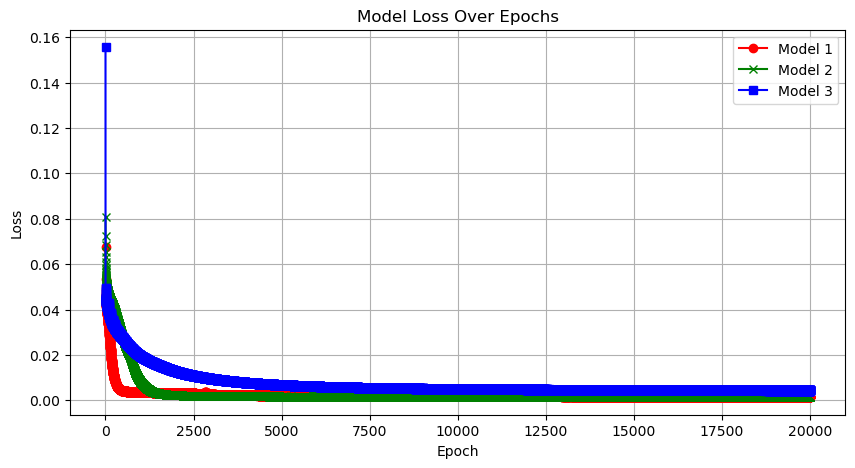

In [111]:

plt.figure(figsize=(10,5))

# Plot the models with different line styles and markers for better visualization
plt.plot(m1_epoch_arr, m1_loss_arr, color="red", marker='o', label="Model 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color="green", marker='x', label="Model 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color="blue", marker='s',  label="Model 3")

# Change the title and axis labels for better clarity
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.grid(True)

# Add a legend in a different location
plt.legend(loc='upper right')

# Show the plot
plt.show()


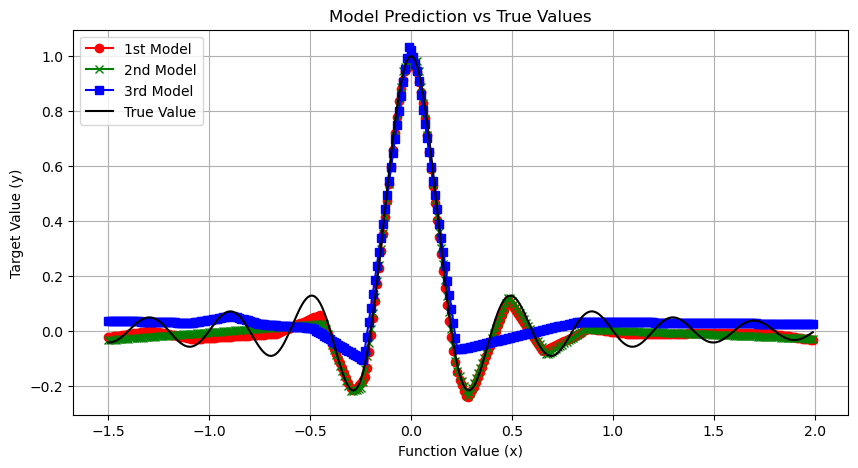

In [112]:

plt.figure(figsize=(10,5))

plt.plot(x, m1_prediction.data, color="red", marker='o', label='1st Model')
plt.plot(x, m2_prediction.data, color="green", marker='x', label='2nd Model')
plt.plot(x, m3_prediction.data, color="blue", marker='s',  label='3rd Model')

# Plot the true value with a different style (thicker line)
plt.plot(x, y, color="black", label='True Value')

# Add title and axis labels with a different format
plt.title('Model Prediction vs True Values')
plt.xlabel('Function Value (x)')
plt.ylabel('Target Value (y)')

# Add gridlines to the plot
plt.grid(True)

# Add a legend with a different location and slightly larger font
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [113]:
torch.manual_seed(1)

In [114]:
x = np.expand_dims(np.arange(-1.5, 2, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(350, 1)
(350, 1)


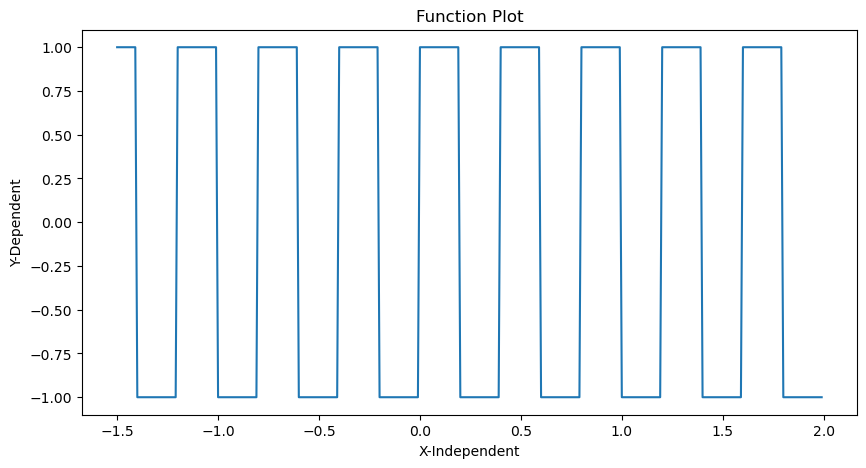

In [115]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title('Function Plot')
plt.xlabel('X-Independent')
plt.ylabel('Y-Dependent')
plt.show()

In [116]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = train_model(model_sign_1, x, y)

461
Epoch: 500, Loss: 0.9669
Epoch: 1000, Loss: 0.6074
Epoch: 1500, Loss: 0.3863
Epoch: 2000, Loss: 0.3422
Epoch: 2500, Loss: 0.3221
Epoch: 3000, Loss: 0.3075
Epoch: 3500, Loss: 0.2993
Epoch: 4000, Loss: 0.2940
Epoch: 4500, Loss: 0.2890
Epoch: 5000, Loss: 0.2866
Epoch: 5500, Loss: 0.2802
Epoch: 6000, Loss: 0.2772
Epoch: 6500, Loss: 0.2723
Epoch: 7000, Loss: 0.2666
Epoch: 7500, Loss: 0.2628
Epoch: 8000, Loss: 0.2595
Epoch: 8500, Loss: 0.2563
Epoch: 9000, Loss: 0.2532
Epoch: 9500, Loss: 0.2511
Epoch: 10000, Loss: 0.2494
Epoch: 10500, Loss: 0.2480
Epoch: 11000, Loss: 0.2469
Epoch: 11500, Loss: 0.2453
Epoch: 12000, Loss: 0.2445
Epoch: 12500, Loss: 0.2434
Epoch: 13000, Loss: 0.2428
Epoch: 13500, Loss: 0.2418
Epoch: 14000, Loss: 0.2412
Epoch: 14500, Loss: 0.2398
Epoch: 15000, Loss: 0.2396
Epoch: 15500, Loss: 0.2390
Epoch: 16000, Loss: 0.2382
Epoch: 16500, Loss: 0.2385
Epoch: 17000, Loss: 0.2376
Epoch: 17500, Loss: 0.2371
Epoch: 18000, Loss: 0.2373
Epoch: 18500, Loss: 0.2357
Epoch: 19000, Los

In [117]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = train_model(model_sign_2, x, y)

117
Epoch: 500, Loss: 0.9862
Epoch: 1000, Loss: 0.9464
Epoch: 1500, Loss: 0.7987
Epoch: 2000, Loss: 0.7033
Epoch: 2500, Loss: 0.6103
Epoch: 3000, Loss: 0.5799
Epoch: 3500, Loss: 0.5734
Epoch: 4000, Loss: 0.5706
Epoch: 4500, Loss: 0.5679
Epoch: 5000, Loss: 0.5652
Epoch: 5500, Loss: 0.5627
Epoch: 6000, Loss: 0.5608
Epoch: 6500, Loss: 0.5345
Epoch: 7000, Loss: 0.5224
Epoch: 7500, Loss: 0.5151
Epoch: 8000, Loss: 0.5095
Epoch: 8500, Loss: 0.5055
Epoch: 9000, Loss: 0.5018
Epoch: 9500, Loss: 0.4991
Epoch: 10000, Loss: 0.4971
Epoch: 10500, Loss: 0.4925
Epoch: 11000, Loss: 0.4754
Epoch: 11500, Loss: 0.4701
Epoch: 12000, Loss: 0.4661
Epoch: 12500, Loss: 0.4637
Epoch: 13000, Loss: 0.4615
Epoch: 13500, Loss: 0.4593
Epoch: 14000, Loss: 0.4579
Epoch: 14500, Loss: 0.4565
Epoch: 15000, Loss: 0.4556
Epoch: 15500, Loss: 0.4547
Epoch: 16000, Loss: 0.4541
Epoch: 16500, Loss: 0.4537
Epoch: 17000, Loss: 0.4531
Epoch: 17500, Loss: 0.4526
Epoch: 18000, Loss: 0.4520
Epoch: 18500, Loss: 0.4516
Epoch: 19000, Los

In [118]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = train_model(model_sign_3, x, y)

286
Epoch: 500, Loss: 0.9623
Epoch: 1000, Loss: 0.9234
Epoch: 1500, Loss: 0.8453
Epoch: 2000, Loss: 0.7487
Epoch: 2500, Loss: 0.6651
Epoch: 3000, Loss: 0.6022
Epoch: 3500, Loss: 0.5573
Epoch: 4000, Loss: 0.5242
Epoch: 4500, Loss: 0.4990
Epoch: 5000, Loss: 0.4789
Epoch: 5500, Loss: 0.4625
Epoch: 6000, Loss: 0.4485
Epoch: 6500, Loss: 0.4366
Epoch: 7000, Loss: 0.4260
Epoch: 7500, Loss: 0.4166
Epoch: 8000, Loss: 0.4080
Epoch: 8500, Loss: 0.4003
Epoch: 9000, Loss: 0.3932
Epoch: 9500, Loss: 0.3869
Epoch: 10000, Loss: 0.3810
Epoch: 10500, Loss: 0.3757
Epoch: 11000, Loss: 0.3709
Epoch: 11500, Loss: 0.3663
Epoch: 12000, Loss: 0.3622
Epoch: 12500, Loss: 0.3584
Epoch: 13000, Loss: 0.3549
Epoch: 13500, Loss: 0.3517
Epoch: 14000, Loss: 0.3488
Epoch: 14500, Loss: 0.3460
Epoch: 15000, Loss: 0.3434
Epoch: 15500, Loss: 0.3410
Epoch: 16000, Loss: 0.3387
Epoch: 16500, Loss: 0.3366
Epoch: 17000, Loss: 0.3346
Epoch: 17500, Loss: 0.3316
Epoch: 18000, Loss: 0.3297
Epoch: 18500, Loss: 0.3279
Epoch: 19000, Los

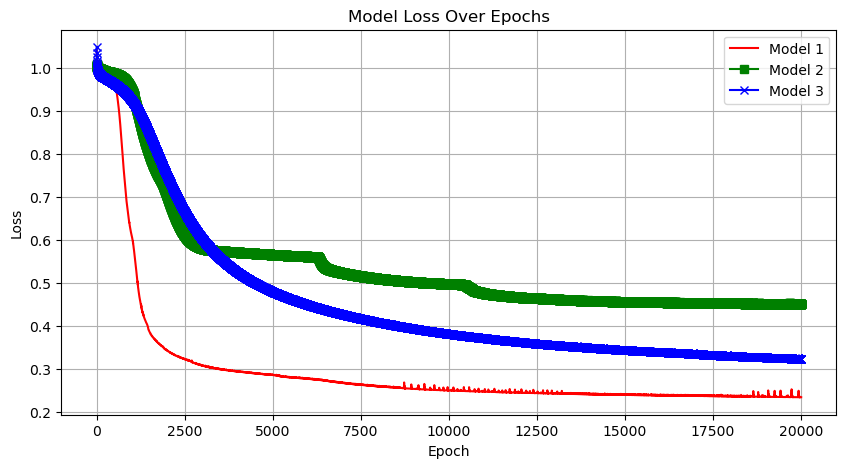

In [119]:

plt.figure(figsize=(10, 5))

plt.plot(m1_epoch_arr, m1_loss_arr, color="red", label="Model 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color="green", marker='s', label="Model 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color="blue", marker='x',  label="Model 3")

plt.grid(True)

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')

# Show the plot
plt.show()


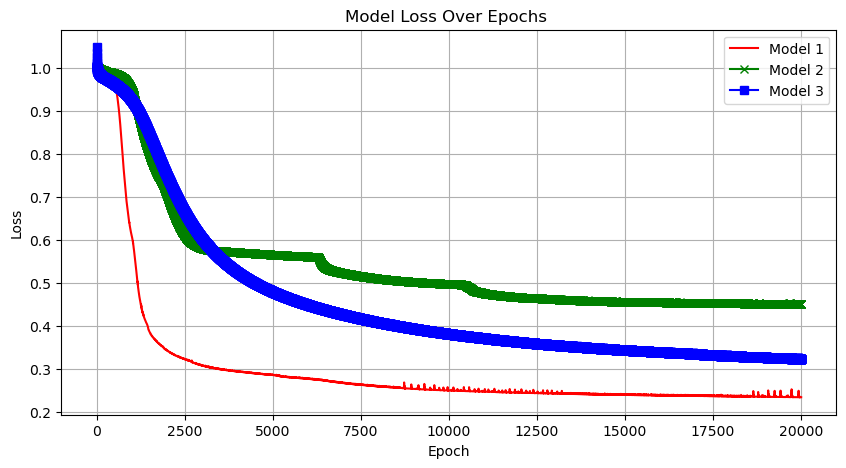

In [120]:

plt.figure(figsize=(10,5))
plt.plot(m1_epoch_arr, m1_loss_arr, color="red",  label="Model 1")
plt.plot(m2_epoch_arr, m2_loss_arr, color="green", marker='x', label="Model 2")
plt.plot(m3_epoch_arr, m3_loss_arr, color="blue",  marker='s', label="Model 3")

plt.grid(True)

plt.title('Model Loss Over Epochs ')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')

# Show the plot
plt.show()


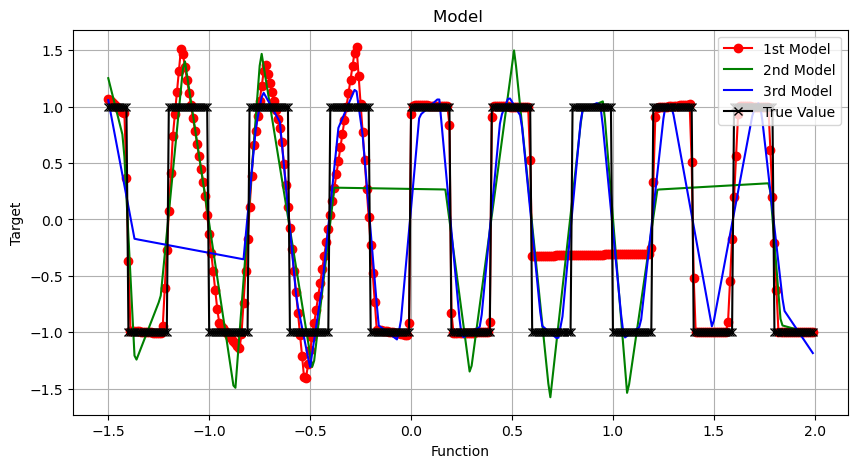

In [121]:

plt.figure(figsize=(10, 5))
plt.plot(x, m1_prediction.data, color="red",  marker='o',  label='1st Model')
plt.plot(x, m2_prediction.data, color="green", label='2nd Model')
plt.plot(x, m3_prediction.data, color="blue",  label='3rd Model')

plt.plot(x, y, color="black",marker='x',label='True Value')

plt.grid(True)

plt.title('Model ')
plt.xlabel('Function')
plt.ylabel('Target')

plt.legend(loc='best')

plt.show()
